# Tesla and GameStop Stock and Revenue Dashboard
**Name:** Syed Faizan Ali  
**Date:** 7/8/2025  

**Description:**  
This notebook is created as part of the IBM Coursera Capstone Project. I am a detail-oriented learner focused on applying data science skills to practical business and technical problems. This project demonstrates end-to-end data extraction, visualization, and dashboard creation for Tesla and GameStop stock and revenue data using Python, web scraping, yfinance, and matplotlib. The final output includes code, results, and visual dashboards, and is submitted through GitHub for grading as per the assignment rubric.


## 🔹 Question 1 – Extracting Tesla Stock Data Using yfinance

In [16]:
import yfinance as yf

tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.reset_index(inplace=True)
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## 🔹 Question 2 – Extracting Tesla Revenue Data Using Webscraping

***Use BeautifulSoup or pandas.read_html():***

In [17]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Use Wayback Machine archived version of the Tesla revenue page
url = "https://web.archive.org/web/20230210063857/https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {"User-Agent": "Mozilla/5.0"}
r = requests.get(url, headers=headers)

soup = BeautifulSoup(r.text, "html.parser")
tables = soup.find_all("table")

# Use second table (known position of quarterly revenue on archived page)
tesla_revenue = []
rows = tables[1].find_all("tr")

for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        if revenue != "":
            tesla_revenue.append([date, revenue])

tesla_revenue_df = pd.DataFrame(tesla_revenue, columns=["Date", "Revenue"])
tesla_revenue_df.head()


,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"


## 🔹 Question 3 – Extracting GameStop Stock Data Using yfinance

In [18]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## 🔹 Question 4 – Extracting GameStop Revenue Data Using Webscraping
***Same structure as Tesla revenue:***

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Archived version of GameStop revenue page
url = "https://web.archive.org/web/20230210063616/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

headers = {"User-Agent": "Mozilla/5.0"}
r = requests.get(url, headers=headers)

soup = BeautifulSoup(r.text, "html.parser")
tables = soup.find_all("table")

# Extract from second table (same position as Tesla's revenue table)
gme_revenue = []
rows = tables[1].find_all("tr")

for row in rows[1:]:
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        if revenue != "":
            gme_revenue.append([date, revenue])

# Create DataFrame
gme_revenue_df = pd.DataFrame(gme_revenue, columns=["Date", "Revenue"])
gme_revenue_df.head()


,Date,Revenue
0,2022-10-31,"$1,186"
1,2022-07-31,"$1,136"
2,2022-04-30,"$1,378"
3,2022-01-31,"$2,254"
4,2021-10-31,"$1,297"


## 🔹 Question 5 – Tesla Stock and Revenue Dashboard
***Use plotly or matplotlib:***

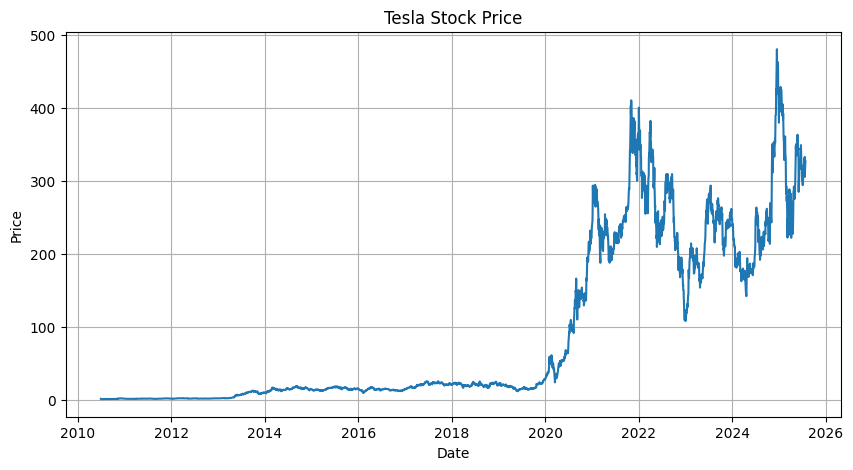

In [21]:
import matplotlib.pyplot as plt

# Plot stock
plt.figure(figsize=(10,5))
plt.plot(tesla_data['Date'], tesla_data['Close'])
plt.title("Tesla Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.show()

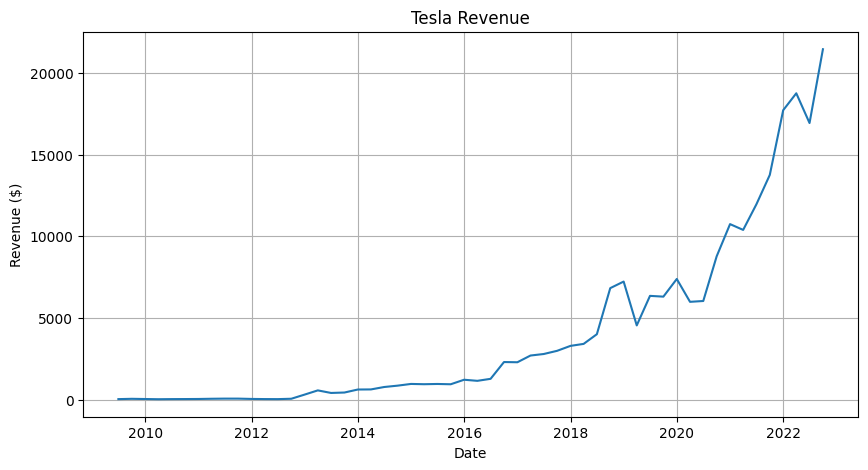

In [20]:
import matplotlib.pyplot as plt

# Convert date column to datetime
tesla_revenue_df['Date'] = pd.to_datetime(tesla_revenue_df['Date'])

# Clean the revenue column and convert to float
tesla_revenue_df['Revenue'] = tesla_revenue_df['Revenue'].str.replace('$','').str.replace(',','').astype(float)

# Plot
plt.figure(figsize=(10,5))
plt.plot(tesla_revenue_df['Date'], tesla_revenue_df['Revenue'])
plt.title("Tesla Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.grid()
plt.show()


## 🔹 Question 6 – GameStop Stock and Revenue Dashboard
***Similar to above:***

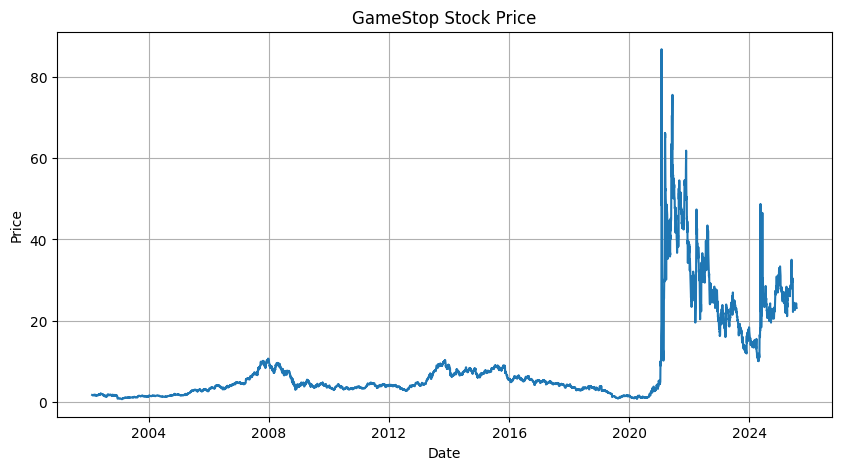

In [23]:
plt.figure(figsize=(10,5))
plt.plot(gme_data['Date'], gme_data['Close'])
plt.title("GameStop Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()
plt.show()

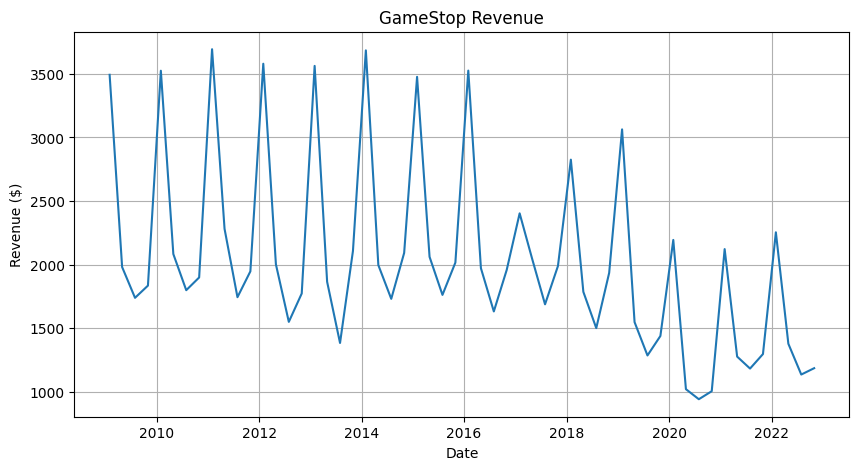

In [24]:
import matplotlib.pyplot as plt

# Convert Date column to datetime
gme_revenue_df['Date'] = pd.to_datetime(gme_revenue_df['Date'])

# Clean Revenue column and convert to float
gme_revenue_df['Revenue'] = gme_revenue_df['Revenue'].str.replace('$','').str.replace(',','').astype(float)

# Plot
plt.figure(figsize=(10,5))
plt.plot(gme_revenue_df['Date'], gme_revenue_df['Revenue'])
plt.title("GameStop Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.grid()
plt.show()
